In [ ]:
import torch
import torch.nn as nn
import torch.functional as F
import math
import pandas as pd
import os
import  torch.optim as optim

d_model = 32#QKV空间维度
n_head = 8#头个数   

#配置文档
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 2332030,      # Your seed number, you can pick your lucky number. :)
    'select_all': False,   # Whether to use all features.
    'valid_ratio': 0.2,   # validation_size = train_size * valid_ratio
    'n_epochs': 20000,     # Number of epochs.            
    'batch_size': 256, 
    'learning_rate': 1e-3,              
    'early_stop': 600,    # If model has not improved for this many consecutive epochs, stop training.     
    'save_path': './models/model.ckpt'  # Your model will be saved here.
}



input_dim = 32
class My_Model(nn.Module):
    def __init__(self, input_dim):
        super(My_Model,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim,input_dim),
            nn.ReLU()
        )
        self.attention = nn.MultiheadAttention(embed_dim=32,num_heads=1)
        self.out = nn.Linear(10,1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        x = self.model(x)
        query = x
        key = x
        value = x
        x,attention_weights = self.attention(query, key, value)
        #x = self.relu(self.out(x))
        #x = x.squeeze(1)
        return x,attention_weights




a=torch.Tensor(pd.read_excel("/mnt/home/jiangfengrui/Code/MLP/data1.xlsx").values)
a=(a-torch.mean(a))/torch.std(a)
#b= b.view(4,250,32) #reshape
net = My_Model(input_dim)
output,attention_weights = net(a)
print(output.shape,attention_weights)

: 

In [7]:
output = output.view(1000,32)
output = output.detach().numpy()
df = pd.DataFrame(output)
df.to_excel('matrix.xlsx', index=False)

根据矩阵值绘制色块图

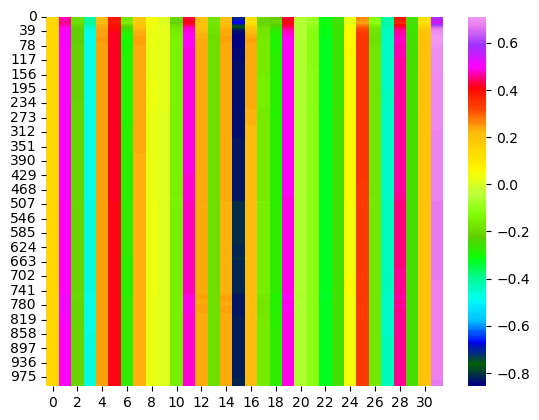

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_plot = sns.heatmap(output,center=0,cmap='gist_ncar')
#plt.imshow(output,cmap=('gray'))

output, attention_weights = attention(query, key, value)有俩返回值

torch.Size([1999, 32])
torch.Size([1999, 1999])


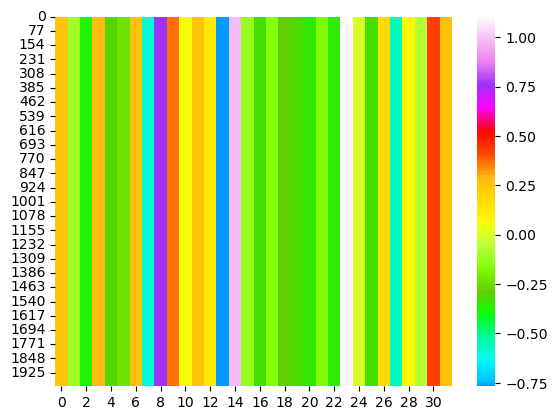

In [19]:

import torch
from torch import nn
import pandas as pd

a=torch.Tensor(pd.read_excel("/mnt/home/jiangfengrui/Code/MLP/data1.xlsx").values)
a=(a-torch.mean(a))/torch.std(a)
# 假设我们有一些查询、键和值的嵌入
query = a  # (batch_size, num_queries, embedding_dim)
key = value = query  # 在这个例子中，我们使用相同的query, key, value
 
# 实例化多头注意力层
attention = nn.MultiheadAttention(embed_dim=32, num_heads=1)
 
# 通过多头注意力层传递查询
output, attention_weights = attention(query, key, value)
 
# 输出的形状应该为 (batch_size, num_queries, embedding_dim)
print(output.shape)
# 注意力权重的形状应该为 (batch_size, num_heads, num_queries, num_queries)
print(attention_weights.shape)
import matplotlib.pyplot as plt
import seaborn as sns
output = output.detach().numpy()
heatmap_plot = sns.heatmap(output,center=0,cmap='gist_ncar')

多头注意力机制

In [10]:
import torch
import torch.nn as nn
import torch.functional as F
import math
import pandas as pd
import os
import  torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from sklearn.preprocessing import StandardScaler
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
input_dim = 512
#网络结构

class multi_head_attention(nn.Module):

    def __init__(self,d_model,n_head,input_dim):
        super(multi_head_attention,self).__init__()

        self.n_head = n_head
        self.d_model = d_model
        self.w_q = nn.Linear(d_model,d_model)
        self.w_k = nn.Linear(d_model,d_model)
        self.w_v = nn.Linear(d_model,d_model)
        self.w_combine = nn.Linear(d_model,d_model)
        self.softmax = nn.Softmax(dim=-1)
        self.LSTM = nn.LSTM(input_dim,5,1)
        self.nn = nn.Linear(5,1)

    def forward(self,q,k,v):
        batch,time,dimension = q.shape
        n_d = self.d_model //self.n_head
        q, k, v = self.w_q(q),self.w_k(k),self.w_v(v)
        q = q.view(batch,time,self.n_head,n_d).permute(0,2,1,3)#更换维度顺序 0，1，2，3 -> 0,2,1,3
        k = k.view(batch,time,self.n_head,n_d).permute(0,2,1,3)
        v = v.view(batch,time,self.n_head,n_d).permute(0,2,1,3)
        score = q @ k.transpose(2,3)/math.sqrt(n_d)
        mask = torch.tril(torch.ones(time,time,dtype=bool))
        score = score.masked_fill(mask == 0, float("-inf"))
        score = self.softmax(score) @ v
        score = score.permute(0,2,1,3).contiguous().view(batch, time, dimension)
        attention = self.w_combine(score)
        return attention
d_model = 512
n_head = 4
net = multi_head_attention(d_model, n_head, input_dim)
a = torch.rand([3, 512, 512])
b = net(a,a,a)
print(b.size())

torch.Size([3, 512, 512])


图像基本处理

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import torch
device = 'cpu'
# 1. 加载图片
image_path = "image.png"
image = Image.open(image_path)

# 2. 定义转换
transform = transforms.Compose([
    #transforms.Resize((224, 224)),  # 调整图片大小
    transforms.ToTensor(),           # 将图片转换为张量
])

# 3. 应用转换
input_image = transform(image)

# 4. 添加批次维度（可选）
#input_image = input_image.unsqueeze(0)

# 5. 将图像转换为 float 类型，并可选择移至 GPU
input_image = input_image.float()  # 将张量转换为 float 类型
input_image = input_image.to(device)  # 如果你想将张量移至 GPU，需要指定 device

# 6. 查看张量形状
print("Input image shape:", input_image.shape)
import matplotlib.pyplot as plt
import seaborn as sns
input_image = input_image.view(1,512*512*3)
input_image = input_image[0,512*512*2:512*512*3]
print(input_image.size())
output = input_image.detach().numpy()
output = output.reshape(512,512)
print(len(output))

heatmap_plot = sns.heatmap(output,center=0,cmap='gist_ncar')


In [20]:
import torch
from torch import nn 
import torch.nn.functional as F
import math

In [21]:
enc_voc_size = 6000
dec_voc_size = 8000
src_pad_idx = 1
trg_pad_idx = 1
trg_sos_idx = 2
batch_size = 128
max_len = 1024
d_model = 512
n_layers = 3
n_heads = 2
ffn_hidden = 1024
drop_prob = 0.1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Token embdeding

In [11]:
class tokenembedding(nn.Embedding):
    def __init__(self,vocab_size,d_model):
        super(tokenembedding,self).__init__(vocab_size,d_model,padding_idx=1)
        

postion embeding

In [12]:
class Postionembeding(nn.Module):
    def __init__(self,d_model, maxlen, device):
        super(Postionembeding,self).__init__()
        self.encoding = torch.zeros(maxlen, d_model, device)
        self.encoding.requires_grad_(False)

        pos = torch.arange(0, maxlen, device)
        pos = pos.float().unsqueeze(1)
        _2i = torch.arange(0, d_model, 2, device)

        self.encoding[:,0::2] = torch.sin(pos / (10000 ** (_2i / d_model)))
        self.encoding[:,1::2] = torch.cos(pos / (10000 ** (_2i / d_model)))

    def forward(self,x):
        seq_len = x.shape[1]
        return self.encoding[:seq_len,:]
                                        

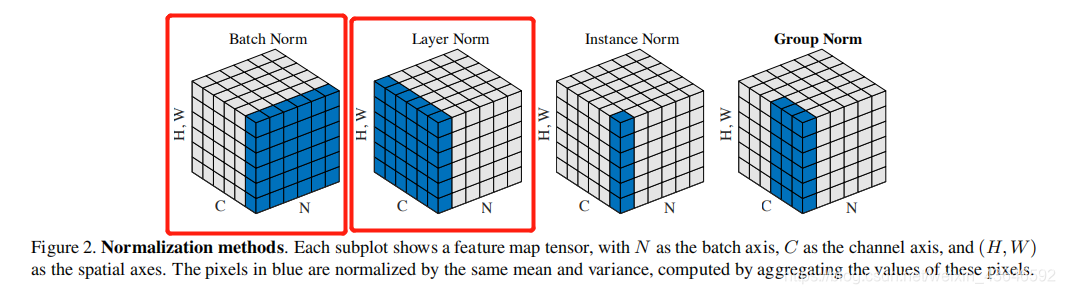

layer Norm

减少显存需求

(输入-减去均值)/方差->放缩

In [13]:
class layernorm(nn.Module):
    def __init__(self, d_model, eps=1e-10):
        super(layernorm,self).__init__()
        self.gamma = nn.parameter(torch.ones(d_model))
        self.beta = nn.parameter(torch.zeros(d_model))
        self.eps = eps

    def forward(self,x):
        mean = x.mean(-1, keepdim=True)
        var = x.var(1, unbiased = False)
        out = (x-mean) / torch.sqrt(var + self.eps)
        out = self.gamma * out + self.beta
        return out

FFN

position wise fully connected feed forward network

In [14]:
class positionwisefeedforward(nn.Module):
    def __init__(self, d_model, hidden, dropout=0.1):
        self.fc1 = nn.Linear(d_model, hidden)
        self.fc2 = nn.Linear(hidden, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# total embedding

In [15]:
class transformerembeding(nn.Module):
    def __init__(self, vocab_size, d_model, max_len, drop_prob, device):
        super(transformerembeding,self).__init__()
        self.tok_emb = tokenembedding(vocab_size, d_model)
        self.pos_emb = Postionembeding(d_model, max_len, device)
        self.drop_out = nn.Dropout(p=drop_prob)

    def forward(self, x):
        tok_emb = self.tok_emb(x)
        pos_emb = self.pos_emb(x)
        return self.drop_out(tok_emb + pos_emb)

# Encoderlayer

In [16]:
class encoderlayer(nn.Module):
    def __init__(self, d_model, ffn_hidden, n_head, drop_prob) ->None:
        super(encoderlayer, self).__init__()
        self.attention = multi_head_attention(d_model, n_head)
        self.norm1 = layernorm(d_model)
        self.drop1 = nn.Dropout(drop_prob)

        self.ffn = positionwisefeedforward(d_model, ffn_hidden, drop_prob)
        self.norm2 = layernorm(d_model)
        self.drop2 = nn.Dropout(drop_prob)

    def forward(self, x, mask=None):
        _x = x
        x = self.attention(x, x, x, mask)

        x = self.drop1(x)
        x = self.norm1(x + _x)

        _x = x
        x = self.ffn(x)

        x = self.drop2(x)
        x = self.norm2(x + _x)

        return x

# Decoderlayer

In [ ]:
class decoderlayer(nn.Module):
    def __init__(self, d_model, ffn_hidden, n_head, drop_prob):
        super(decoderlayer, self).__init__()
        self.attention1 = multi_head_attention(d_model, n_head)
        self.norm1 = layernorm(d_model)
        self.dropout1 = nn.Dropout(drop_prob)

        self.cross_attention = multi_head_attention(d_model, n_head)
        self.norm2 = layernorm(d_model)
        self.dropout2 = nn.Dropout(drop_prob)

        self.ffn = positionwisefeedforward(d_model, ffn_hidden, drop_prob)
        self.norm3 = layernorm(d_model)
        self.dropout3 = nn.Dropout(drop_prob)
    
    def forward(self, dec, enc, t_mask, s_mask):
        _x = dec
        x = self.attention1(dec, dec, dec, s_mask)

        x = self.dropout1(x)
        x = self.norm1(x + _x)

        if  enc is not None:
            _x = x
            x = self.cross_attention(x, enc, enc, s_mask)

            x = self.dropout2(x)
            x = self.norm2(x + _x)
        
        _x = x
        x = self.ffn(x)

        x = self.dropout3(x)
        x = self.norm3(x + _x)
        return x

In [ ]:
class Encoder(nn.Module):
    def __init__(
            self,
            env_voc_size,
            max_len,
            d_model,
            ffn_hidden,
            n_head,
            n_layer,
            drop_prob,
            device,
    ):
        super (Encoder, self).__init__()

        self.embedding = transformerembeding(
            env_voc_size, d_model, max_len, drop_prob, device
        )

        self.layers = nn.ModuleList(
            [
                encoderlayer(d_model, ffn_hidden, n_head, drop_prob)
                for _ in range(n_layer)
            ]
        )

    def forward(self, x, s_mask):
        x = self.embedding(x)
        for layer in self.layers:
            x = layer(x, s_mask)
        return x    

In [18]:
class Decoder(nn.Module):
    def __init__(
        self,
        dec_voc_size,
        max_len,
        d_model,
        ffn_hidden,
        n_head,
        n_layer,
        drop_prob,
        device,     
    ):
        super(Decoder, self).__init__()

        self.embedding = transformerembeding(
            dec_voc_size, d_model, max_len, drop_prob, device
        )

        self.layers = nn.ModuleList(
            [
                decoderlayer(d_model, ffn_hidden, n_head, drop_prob)
                for _ in range(n_layer)
            ]
        )

        self.fc = nn.Linear(d_model, dec_voc_size)
    def forward(self, dec, enc, t_mask, s_mask):
        dec = self.embedding(dec)
        for layer in self.layers:
            dec = layer(dec, enc, t_mask, s_mask)
        
        dec = self.fc(dec)

        return dec

In [17]:
class Transformer(nn.Module):
    def __init__(
            self,
            src_pad_idx,
            trg_pad_idx,
            enc_voc_size,
            dec_voc_size,
            max_len,
            d_model,
            n_head,
            ffn_hidden,
            n_layers,
            drop_prob,
            device,
    ):
        super(Transformer, self).__init__()
        self.encoder = Encoder(
            self,
            enc_voc_size,
            max_len,
            d_model,
            ffn_hidden,
            n_head,
            n_layers,
            drop_prob,
            device,
        )
        self.decoder = Decoder(
            dec_voc_size,
            max_len,
            d_model,
            ffn_hidden,
            n_head,
            n_layers,
            drop_prob,
            device,
        )
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
    
    def make_pad_mask(self, q, k, pad_idx_q, pad_idx_k):
        len_q, len_k = q.szie(1), k.size(1)

        # (Batch, Time, len_q, len_k)
        q = q.ne(pad_idx_q).unsqueeze(1).unsqueeze(3)
        q = q.repeat(1, 1, 1, len_k)

        k = k.ne(pad_idx_k).unsqueeze(1).unsqueeze(2)
        k = k.repeat(1, 1, len_q, 1)

        mask = q & k
        return mask

    def make_casual_mask(self, q, k):
        len_q, len_k = q.size(1), k.size(1)
        mask = (
            torch.tril(torch.ones(len_q, len_k)).type(torch.BoolTensor).to(self.device)
        )
        return mask

    def forward(self, src, trg):
        src_mask = self.make_pad_mask(src, src, self.src_pad_idx, self.src_pad_idx)
        trg_mask = self.make_pad_mask(
            trg, trg, self.trg_pad_idx, self.trg_pad_idx
        ) * self.make_casual_mask(trg, trg)
        src_trg_mask = self.make_pad_mask(trg, src, self.trg_pad_idx, self.src_pad_idx)

        enc = self.encoder(src, src_mask)
        ouput = self.decoder(trg, enc, trg_mask, src_trg_mask)
        return ouput


In [ ]:
model = Transformer(src_pad_idx=src_pad_idx,
                    trg_pad_idx=trg_pad_idx,
                    d_model=d_model,
                    enc_voc_size=enc_voc_size,
                    dec_voc_size=dec_voc_size,
                    max_len=max_len,
                    ffn_hidden=ffn_hidden,
                    n_heads=n_heads,
                    n_layers=n_layers,
                    drop_prob=drop_prob,
                    device=device).to(device)

def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.kaiming_uniform(m.weight.data)
        
model.apply(initialize_weights)
src = torch.load('tensor_src.pt')
src = torch.cat((src, torch.ones(src.shape[0], 2, dtype=torch.int)), dim=-1)
trg = torch.load('tensor_trg.pt')
result = model(src, trg)
print(result, result.shape)